## 2. Aprendizagem de máquina

### Objetivos

  - Conhecer uma intuição sobre Redes Neurais Artificiais RNA
  - Praticar os algoritmos Perceptron e multilayer Perceptron (MLP)
  

## Redes Neurais Artificiais

As redes neurais são modelos computacionais inspirados pelo sistema nervoso de um animal capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões.

Tais modelos são muitas vezes utilizados para a tarefa de classificação de padrões, podendo gerar classificadores com características variadas.  

As redes neurais artificiais possuem em comum o fato de serem constituídas por neurônios que se conectam entre si através de através de sinapses. A rede neural mais conhecida são as baseadas em Perceptron multicamada (MLP) embora existam outras redes como rede de Kohonem, as redes de base radial e a rede de Hopfield.




Complete_neuron_cell_diagram_en.svg

### Os principais componentes dos neurônios são:

   - Os `dendritos`, que têm por função receber os estímulos transmitidos pelos outros neurônios;
   - O `corpo` de neurônio, também chamado de soma, que é responsável por coletar e combinar informações vindas de outros neurônios;
   - O `axônio`, que é constituído de uma fibra tubular que pode alcançar até alguns metros, e é responsável por transmitir os estímulos para outras células.

## Perceptron


O classificador Perceptron foi o primeiro classificador baseado em redes neurais que empregou uma regra de aprendizado capaz de garantir a correta separação de classes linearmente separáveis.

No início do treinamento, os pesos dos neurônios recebem valores aleatórios. Então, para cada amostra de treinamento com erro de classificação, os pesos dos neurônios são ajustados de modo a tentar corrigir a classe.

Após o treinamento, cada neurônio na camada de saída testa a pertinência da amostra a uma classe. No caso de mais de um neurônio fornecer resposta positiva a amostra, a classe correspondente ao neurônio de maior resposta vence.




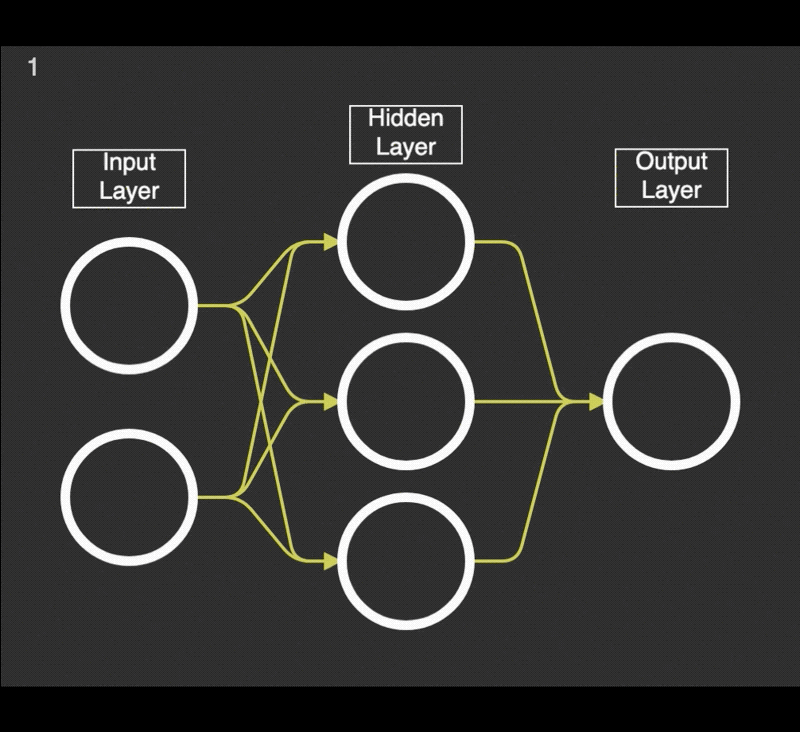

In [6]:
from IPython.display import Image

fname = '/content/rna.gif'
Image(open(fname, 'rb').read())  # local

A rede Perceptron possui um algoritmo de aprendizado supervisionado que consegue definir um classificador que encontra a superfície de separação entre quaisquer duas classes linearmente separáveis


In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=header)

In [ ]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = df[['petal_length', 'petal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

In [ ]:
# Separamos 20 % para o teste
from sklearn.model_selection import train_test_split
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)
print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

### Instanciar o classificador e treiná-lo com as amostras de treinamento

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [ ]:
from sklearn.linear_model import Perceptron


modelo = Perceptron(tol=1.7)
modelo.fit(entradas_treino, classes_treino)

In [ ]:
classes_encontradas = modelo.predict(entradas_teste)

In [ ]:
from sklearn.metrics import accuracy_score

classes_encontradas_train = modelo.predict(entradas_treino)
print("Acerto médio de classificação treino: ",accuracy_score(classes_encontradas_train, classes_treino))

classes_encontradas = modelo.predict(entradas_teste)
print("Acerto médio de classificação teste: ",accuracy_score(classes_encontradas, classes_teste))

### Análise F1-Score

A pontuação F1 pode ser interpretada como uma média ponderada da precision e recall.

 - Melhor valor = 1
 - Pior valor = 0

A contribuição relativa de precision e recall para a pontuação F1 são iguais. A fórmula para a pontuação F1 é:

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(classes_encontradas, classes_teste))

## Multilayer Perceptron (MLP)

- O acréscimo de uma nova camada de neurônios, denominada camada oculta, permite criar superfícies de separação não lineares, permitindo a classificação de classes não-linearmente separáveis
- A rede MLP é considerada uma rede do tipo feed-forward, já que as saídas dos neurônios das camadas posteriores dependem apenas dos neurônios das camadas anteriores
- Em uma rede MLP, não há regra para o número de neurônios a ser usado na camada oculta, e nem há limites para o número de camadas ocultas a serem usadas
- Aparentemente, um bom chute inicial é considerar o dobro de neurônios na camada oculta com relação ao tamanho da entrada
- É conhecido que com uma única camada oculta com um número suficientemente grande de nós é possível representar qualquer função contínua, e por isso essa estrutura é conhecida como aproximador universal

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html



In [ ]:
from sklearn.neural_network import MLPClassifier

camadas = [4,3]
epocas = 1000
batch_size = 10
ativacao = 'relu' # Escolha dentre 'logistic', 'tanh' ou 'relu'

modelo = MLPClassifier(hidden_layer_sizes=camadas,
                    batch_size=batch_size,
                    activation=ativacao,
                    max_iter=epocas)

In [ ]:
modelo.fit(entradas_treino, classes_treino)

In [ ]:
from sklearn.metrics import accuracy_score


classes_encontradas_train = modelo.predict(entradas_treino)
print("Acerto médio de classificação treino: ",accuracy_score(classes_encontradas_train, classes_treino))

classes_encontradas = modelo.predict(entradas_teste)
print("Acerto médio de classificação teste: ",accuracy_score(classes_encontradas, classes_teste))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes_encontradas, classes_teste))

## Desafio1
Escolha uma dos exemplos dados em sala de aula e implemente um MLP com pelo menos 10 neuronios na camada escondida:

OBS: Só não vale o data da Iris, pois acabamos de usar...

In [ ]:
## Seu código aqui.......


